In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 52.6MB/s 
     |████████████████████████████████| 10.1MB 37.9MB/s 


**Import Library and Load Dataset**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np
import seaborn as sns

#import geopandas as gpd
#import plotly.graph_objects as go


In [0]:
# import suicide statistics data
#data_suicide = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/who-suicide-statistics/who_suicide_statistics.csv")
# import suicide health and population
#data_healthnutrition_and_population = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/health-nutrition-and-population-statistics/data.csv")
# import mental health data
data_mentalhealth = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/mental-health-in-tech-survey/survey.csv")
# import suicide rate from 1985 to 2016
#data_suiciderate19852016 = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/suicide-rates-overview-1985-to-2016/master.csv")
# import human freedom index
#data_humanfreedomindex = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/the-human-freedom-index/hfi_cc_2018.csv")
# import world happines 2015-2017
#data_worldhappines2015 = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/world-happiness/2015.csv")
#data_worldhappines2016 = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/world-happiness/2016.csv")
#data_worldhappines2017 = pd.read_csv("/content/drive/My Drive/KULIAH/VIS/Tugas/Final Project/Dataset/world-happiness/2017.csv")

# import location dataset
data_worldmap = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv")

In [0]:
data_mentalhealth

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [0]:
data_mentalhealth_nonNA = data_mentalhealth.dropna()
data_mentalhealth_nonNA

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,No,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,No,No,Yes,Yes,No,Don't know,No,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,No,Yes,Yes,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2014-11-06 11:24:38,56,female,United States,OR,Yes,No,No,Rarely,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,Maybe,No,No,No,No,Don't know,No,I'm self-employed on contract with small start...
1190,2015-01-03 03:38:30,44,M,United States,OH,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,Yes,Yes,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,My mental health issues were the direct result...
1219,2015-02-21 09:48:13,38,Male,United States,TX,No,No,Yes,Sometimes,More than 1000,Yes,Yes,Yes,No,Yes,Yes,Yes,Very easy,No,No,Yes,Yes,No,No,Don't know,No,I openly discuss my mental health struggles. I...
1221,2015-02-21 10:45:51,46,male,United States,MD,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Just starting a new job hence the numerous I d...


In [0]:
#sns.lineplot(x="year", y='suicides_no', lw= 1, data=data_suicide)

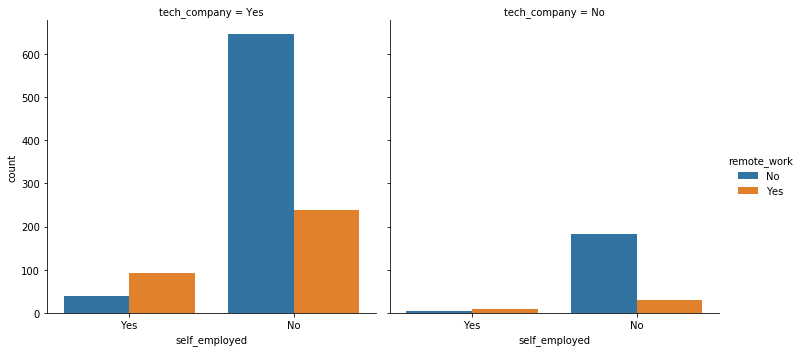

In [0]:
sns.catplot(x='self_employed', hue='remote_work', col='tech_company', kind='count', data=data_mentalhealth)

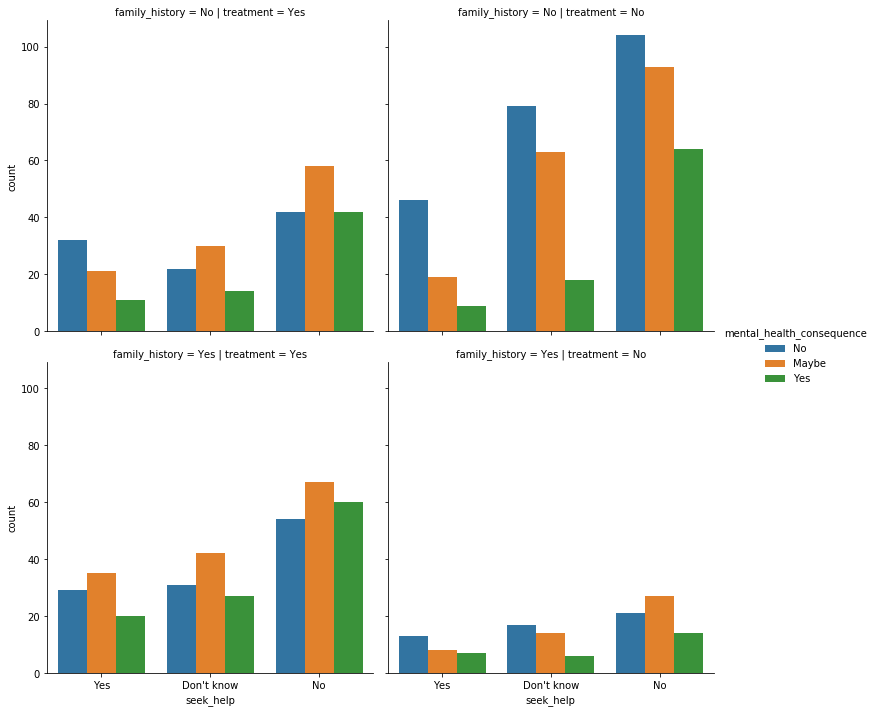

In [0]:
sns.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='family_history', kind='count', data=data_mentalhealth)

In [0]:
d = data_suicide.sort_values(by=['suicides_no'], ascending=False)

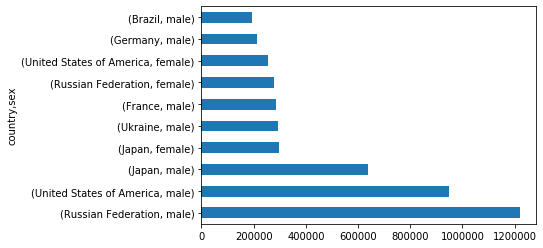

In [0]:
data_suicide.groupby(['country','sex']).suicides_no.sum().nlargest(10).plot(kind='barh')

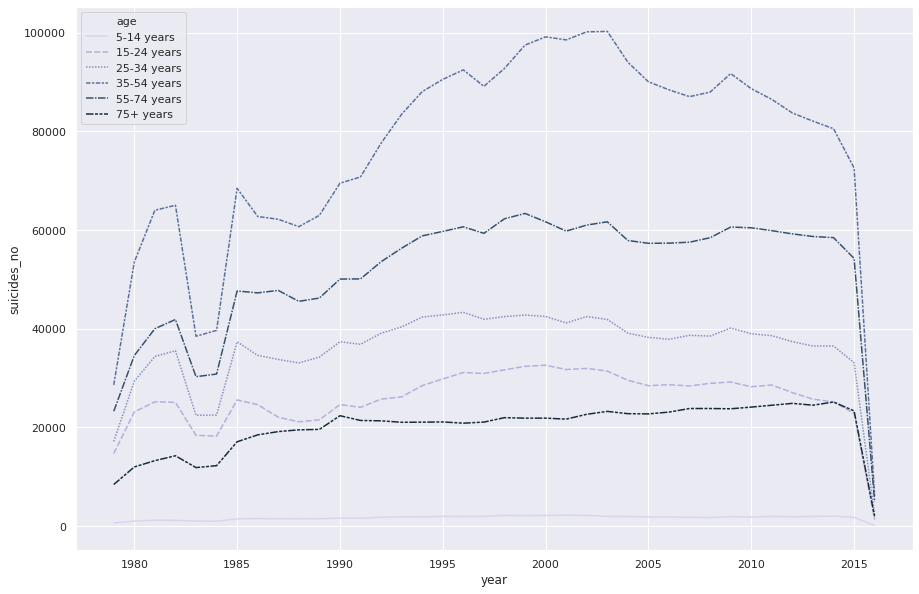

In [0]:
df = data_suicide.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)

**1. Apakah penyakit kesehatan mental lebih sering terjadi pada pekerja IT dibandingkan dengan yang non-IT?**

In [0]:
# mengelompokkan responden berdasarkan background
respondent_data_bg = data_mentalhealth.groupby('tech_company').count()
respondent_data_bg = respondent_data_bg.rename(index={'No': 'Perusahan Non IT', 'Yes': 'Perusahaan IT'})
respondent_data_bg

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
tech_company,,,,,,,,,,,,,,,,,,,,,,,,,,
Perusahan Non IT,228,228,228,228,139,226,228,228,180,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,30
Perusahaan IT,1031,1031,1031,1031,605,1015,1031,1031,815,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,134


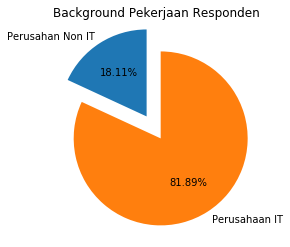

In [0]:
# visualtization
plt.pie(
      respondent_data_bg['treatment'],  # data
      labels=respondent_data_bg.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
      explode=(0.2, 0.1) # supaya mencar satu
)
plt.title('Background Pekerjaan Responden')
plt.show()

In [0]:
# mengelompokkan data berdasar butuh treatment ato nggak
respondent_data_needtreatment = data_mentalhealth.groupby('treatment').count()
respondent_data_needtreatment = respondent_data_needtreatment.rename(index={'No': 'Tidak butuh \'Treatment\'', 'Yes': 'Butuh \'Treatment\''})
respondent_data_needtreatment

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
treatment,,,,,,,,,,,,,,,,,,,,,,,,,,
Tidak butuh 'Treatment',622,622,622,622,337,613,622,362,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,58
Butuh 'Treatment',637,637,637,637,407,628,637,633,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,106


In [0]:
worker_data = data_mentalhealth.groupby('treatment').apply(
                              lambda x: pd.Series(
                                  dict(
                                    non_techcompany_worker=(x.tech_company == 'Yes').sum(),
                                    techcompany_worker=(x.tech_company == 'No').sum()
                                )
                              )
                          )
worker_data = worker_data.rename(index={'No': 'Tidak butuh', 'Yes': 'Butuh'})
worker_data

,non_techcompany_worker,techcompany_worker
treatment,,
Tidak butuh,517,105
Butuh,514,123


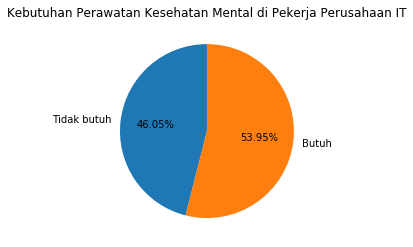

In [0]:
plt.pie(
      worker_data['techcompany_worker'],  # data
      labels=worker_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Kesehatan Mental di Pekerja Perusahaan IT')
plt.show()

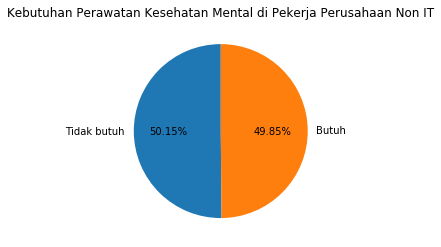

In [0]:
plt.pie(
      worker_data['non_techcompany_worker'],  # data
      labels=worker_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Kesehatan Mental di Pekerja Perusahaan Non IT')
plt.show()

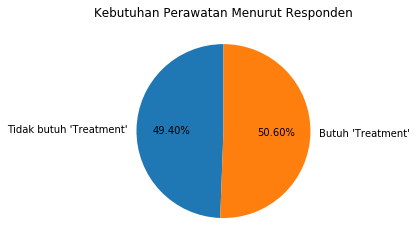

In [0]:
plt.pie(
      respondent_data_needtreatment['tech_company'],  # data
      labels=respondent_data_needtreatment.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Menurut Responden')
plt.show()

In [0]:
treatment_need_data = data_mentalhealth.groupby('tech_company').apply(
                              lambda x: pd.Series(
                                  dict(
                                    need_treatment=(x.treatment == 'Yes').sum(),
                                    dont_need_treatment=(x.treatment == 'No').sum()
                                )
                              )
                          )
treatment_need_data = treatment_need_data.rename(index={'No': 'Pekerja di Perusahaan Non IT', 'Yes': 'Pekerja di Perusahaan IT'})
treatment_need_data

,need_treatment,dont_need_treatment
tech_company,,
Pekerja di Perusahaan Non IT,123,105
Pekerja di Perusahaan IT,514,517


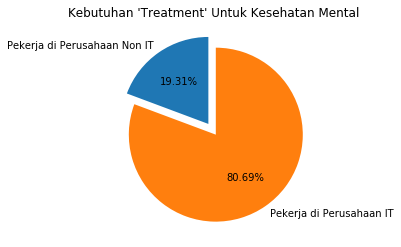

In [0]:
plt.pie(
      treatment_need_data['need_treatment'],  # data
      labels=treatment_need_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label,
      explode=(0.1, 0.05) # supaya mencar satu
)
plt.title('Kebutuhan \'Treatment\' Untuk Kesehatan Mental')
plt.show()

**2. Bagaimana ukuran perusahaan berkaitan dengan memberikan fasilitas pekerja untuk membahas kesehatan mental?**

Text(0.5, 1.0, 'Jumlah Karyawan vs Layanan Perawatan')

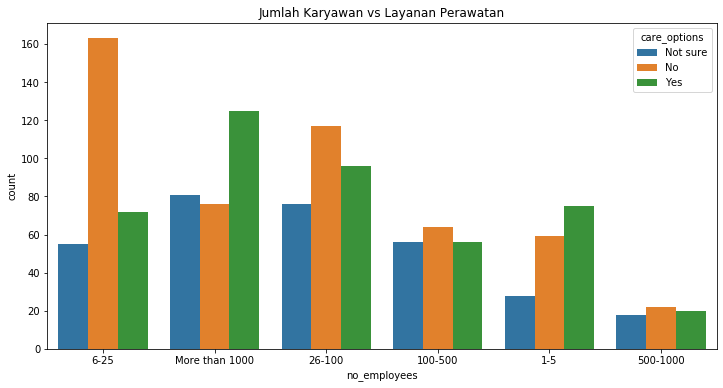

In [0]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data = data_mentalhealth, x = 'no_employees', hue ='care_options' )
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Jumlah Karyawan vs Layanan Perawatan')

**3. Bagaimana persebaran usia responden terhadap kebutuhan perawatan kesehatan mental?**

In [0]:
data_mentalhealth['Age'] = pd.to_numeric(data_mentalhealth['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
data_mentalhealth['Age'] = data_mentalhealth['Age'].apply(age_process)

Text(0, 0.5, 'Frekuensi')

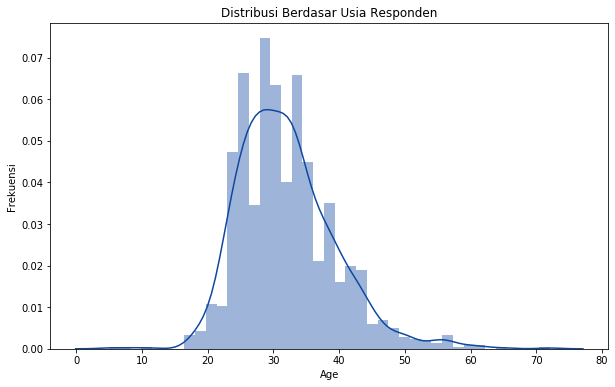

In [0]:
fig = plt.subplots(figsize=(10,6))
sns.distplot(
    data_mentalhealth['Age'].dropna(),
    #ax=ax,
    kde=True,
    color='#0d47a1'
    )
plt.title('Distribusi Berdasar Usia Responden')
plt.ylabel('Frekuensi')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


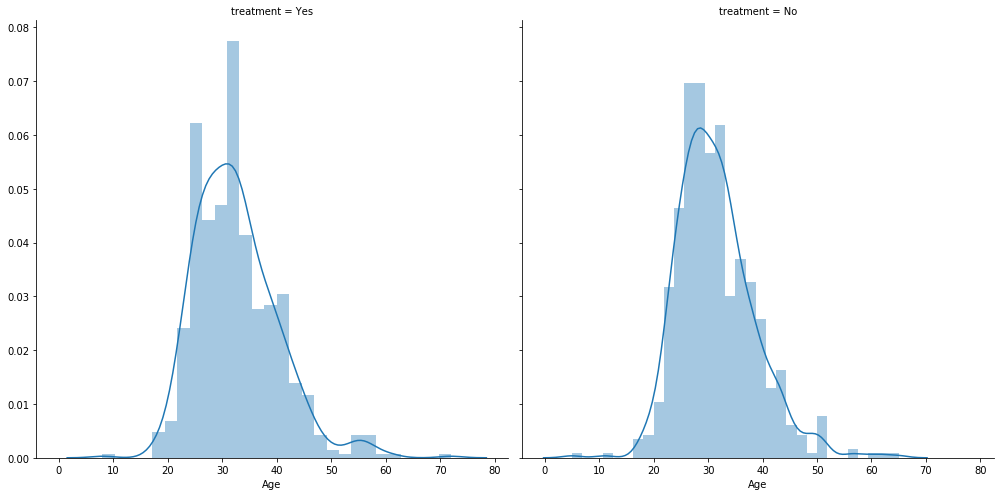

In [0]:
g = sns.FacetGrid(data_mentalhealth, col='treatment', size=7,margin_titles=True)
g = g.map(sns.distplot, "Age")

**4. Bagaimana kerahasiaan identitas seseorang (anonim) memengaruhi kenyamanan berdiskusi dengan atasan?**

In [0]:
# mengelompokkan responden berdasarkan anonimous
anonymous_data = data_mentalhealth.groupby('anonymity').count()
#anonymous_data = anonymous_data.rename(index={'No': 'Non-Anonymous', 'Yes': 'Anonymous'})
anonymous_data['mental_health_consequence']
#anonymous_data['mental_health_consequence'].loc['Yes']

anonymity
Don't know    819
No             65
Yes           375
Name: mental_health_consequence, dtype: int64

In [0]:
anonymous_identity = pd.DataFrame({
    'Anonymous' : [anonymous_data['mental_health_consequence'].loc['Yes']],
    'Non-Anonymous' : [anonymous_data['mental_health_consequence'].loc['No']],
    'Don\'t know' : [anonymous_data['mental_health_consequence'].loc['Don\'t know']]
     })
anonymous_identity.reset_index(drop=True)
anonymous_identity

,Anonymous,Non-Anonymous,Don't know
0,375,65,819


**5. Bagaimana frekuensi penyakit kesehatan mental dan sikap terhadap kesehatan mental menurut lokasi geografis?**	

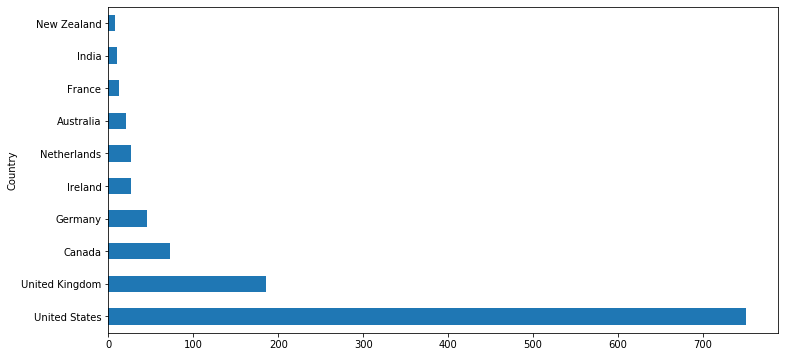

In [0]:
data_mentalhealth.groupby('Country').treatment.count().nlargest(10).plot(kind='barh', figsize=(12,6))

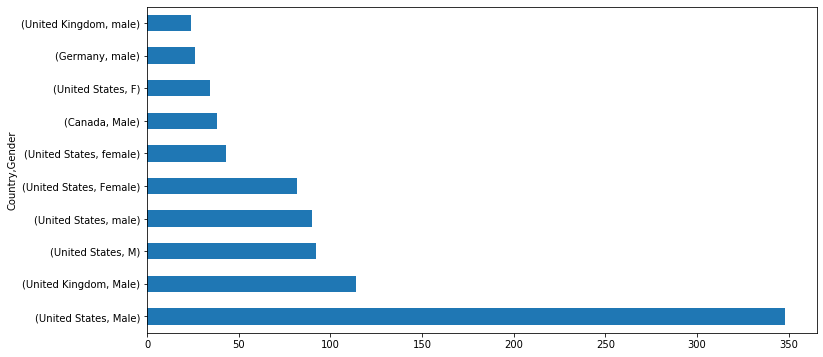

In [0]:
data_mentalhealth.groupby(['Country','Gender']).treatment.count().nlargest(10).plot(kind='barh', figsize=(12,6))

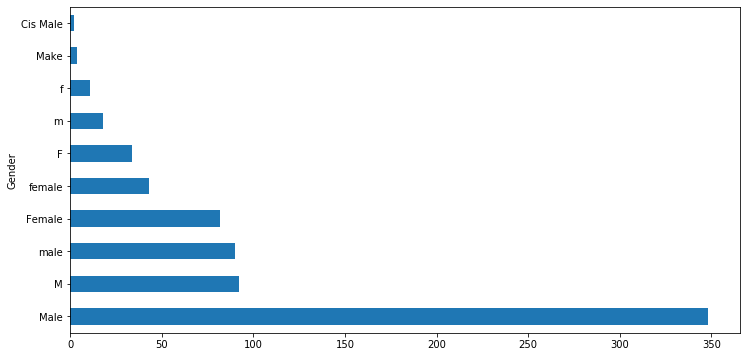

In [0]:
data_mentalhealth[data_mentalhealth['Country'] == 'United States'].groupby('Gender').treatment.count().nlargest(10).plot(kind='barh', figsize=(12,6))

In [0]:
#import plotly.express as px

#gapminder = px.data.gapminder().query("year==2007")
#fig = px.choropleth(gapminder, locations="iso_alpha",
#                    color="lifeExp", # lifeExp is a column of gapminder
##                    hover_name="country", # column to add to hover information
 #                   color_continuous_scale=px.colors.sequential.Plasma)

#fig.show()

In [0]:
#fig = go.Figure(
#    data=go.Choropleth(
#    locations = data_worldmap['CODE'],
#    z = data_worldmap['GDP (BILLIONS)'],
#    text = data_worldmap['COUNTRY'],
#    colorscale = 'Blues',
#    autocolorscale=False,
#    reversescale=True,
#    marker_line_color='darkgray',
#    marker_line_width=0.5,
##    colorbar_tickprefix = '$',
#    colorbar_title = 'GDP<br>Billions US$',
#))

#fig.update_layout(
#    title_text='2014 Global GDP',
#    geo=dict(
#        showframe=False,
#        showcoastlines=False,
#        projection_type='equirectangular'
#    ),
#    annotations = [dict(
#        x=0.55,
#        y=0.1,
#        xref='paper',
#        yref='paper',
#        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
#            CIA World Factbook</a>',
#        showarrow = False
#    )]
#)

#fig.show()